In [5]:
import requests
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import HTML
import matplotlib as mpl
%config InlineBackend.figure_format='svg'
def css_style(url):
    style = requests.get(url)
    return HTML(style.text)

In [2]:
css_style('https://raw.githubusercontent.com/saadtony/NumericalMethods/master/styles/custom.css')

In [3]:
length = np.array([40, 41, 43, 43, 44, 44, 45, 45, 48, 51])
height = np.array([163, 165, 167, 164, 168, 169, 170, 167, 170, 175])

Text(0, 0.5, 'Height (cm)')

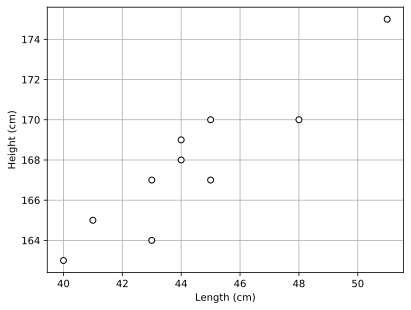

In [8]:
mpl.style.use('default')
plt.plot(length,height,'wo',markeredgecolor='k')
plt.grid()
plt.xlabel('Length (cm)')
plt.ylabel('Height (cm)')

In [9]:
lin_fit = np.polyfit(length, height, 1)

In [10]:
lin_fit # highest power first

array([  1.004329  , 123.20779221])

In [11]:
x = np.linspace(length[0], length[-1], 100)

In [14]:
regress = x*lin_fit[0] + lin_fit[1]

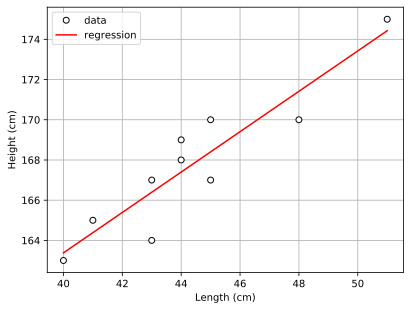

In [15]:
mpl.style.use('default')
plt.plot(length,height,'wo',markeredgecolor='k', label='data')
plt.plot(x, regress, 'r-', label='regression')
plt.grid()
plt.xlabel('Length (cm)')
plt.ylabel('Height (cm)')
plt.legend()

# Solving the system

Using calculus and algebra, the system can be solved directly, or as a matrix system of equations.

## Direct solution

In [22]:
xy = length*height
xybar = len(length)*np.mean(length)*np.mean(height)
xbar = np.mean(length)
xsquared = length**2

In [25]:
a1 = (np.sum(xy) - xybar)/(-len(length)*xbar**2 + np.sum(xsquared))

In [26]:
a1

1.0043290043288626

In [27]:
a0 = np.mean(height) - a1*np.mean(length)
a0

123.20779220779852

## Matrix solution

In [35]:
coeffs = np.array([[len(length), np.sum(length)],
                  [np.sum(length), np.sum(length**2)]])

In [36]:
b = np.array([np.sum(height), np.sum(height*length)])

In [37]:
np.linalg.solve(coeffs, b)

array([123.20779221,   1.004329  ])

## Computing the standard error

In [38]:
reg_vals = length*lin_fit[0] + lin_fit[1]
S = np.sqrt(np.sum((reg_vals-height)**2)/(len(length)-2))

In [39]:
S

1.4317065166379415

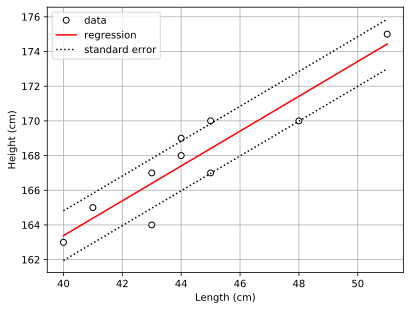

In [54]:
mpl.style.use('default')
plt.plot(length,height,'wo',markeredgecolor='k', label='data')
plt.plot(x, regress, 'r-', label='regression')
plt.plot(x, regress+S, 'k:', label='standard error')
plt.plot(x, regress-S, 'k:')
# plt.plot(x, regress+2*S, 'b:', label='standard error')
# plt.plot(x, regress-2*S, 'b:')
plt.grid()
plt.xlabel('Length (cm)')
plt.ylabel('Height (cm)')
plt.legend()

In [48]:
std1 = 0
std2 = 0
for i in range(len(length)):
    if np.sqrt((reg_vals[i]-height[i])**2) > S:
        std1 += 1
    if np.sqrt((reg_vals[i]-height[i])**2) > 2*S:
        std2 += 1

In [51]:
print(f'Percent of values within one standard error: {(1-std1/len(length))*100:.1f}%')
print(f'Percent of values within two standard error: {(1-std2/len(length))*100:.1f}%')

Percent of values within one standard error: 70.0%
Percent of values within two standard error: 100.0%


The computation above tests the standard error, which in theory states that 68% of the data will fall within one standard error of the regression line.

In this case, with our data, 70% of the points fall within one standard error of the regression line.

Also, the standard error is smaller than the standard deviation, and so the regression performed better than just a line through the mean.

In [55]:
S < np.std(height)

True

In [58]:
# Coefficient of determination
1 - S/np.std(height)

0.5675372310671155

Here, we see that the standard error is more than twice as small as the standard deviation is. If we take a dataset where the standard error and standard deviation would be about the same, we will obtain a very low coefficient of determination:

In [100]:
import random
x = np.linspace(0, 5, 20)
y = np.zeros(len(x))
for i in range(len(x)):
    y[i] = random.uniform(-1, 1)

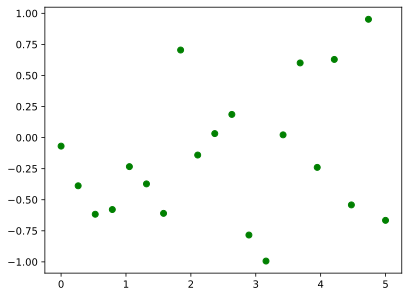

In [101]:
plt.plot(x, y, 'go')

In [102]:
reg_vals = np.polyfit(x, y, 1)

In [103]:
xx = np.linspace(0, 5, 100)
reg = xx*reg_vals[0] + reg_vals[1]

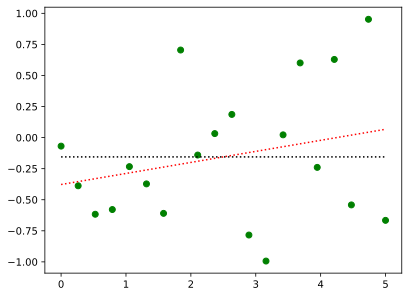

In [104]:
plt.plot(x, y, 'go', label='data')
plt.plot(xx, reg, 'r:', label='regression')
plt.plot(xx, np.ones(len(xx))*np.mean(y), 'k:', label='mean')

In [105]:
reg_vals_new = x*reg_vals[0] + reg_vals[1]
S = np.sqrt(np.sum((y - reg_vals_new)**2)/(len(x)-2))

In [106]:
1 - S/np.std(y)

-0.019054715262438737

In [107]:
reg_vals

array([ 0.08888883, -0.3776341 ])

## A high coefficient of determination

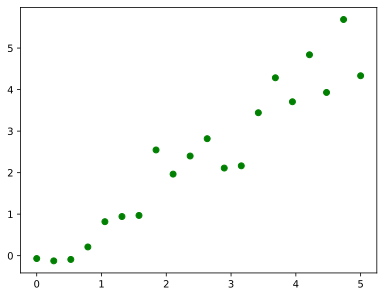

In [108]:
y += x
plt.plot(x,y,'go')

In [109]:
reg_vals = np.polyfit(x, y, 1)
xx = np.linspace(0, 5, 100)
reg = xx*reg_vals[0] + reg_vals[1]

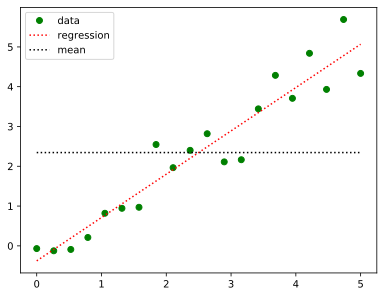

In [110]:
plt.plot(x, y, 'go', label='data')
plt.plot(xx, reg, 'r:', label='regression')
plt.plot(xx, np.ones(len(xx))*np.mean(y), 'k:', label='mean')
plt.legend()

In [111]:
reg_vals_new = x*reg_vals[0] + reg_vals[1]
S = np.sqrt(np.sum((y - reg_vals_new)**2)/(len(y)-2))

In [112]:
1 - S/np.std(y)

0.6891179600376087

In [113]:
S

0.5375909431992448

In [114]:
np.std(y)

1.7292441315177924

## Polynomial regression

In [116]:
n = 20
x = np.linspace(0, 1, n)
y = np.empty(n)
for i in range(n):
    y[i] = x[i]**2 + random.uniform(-.1, .1)

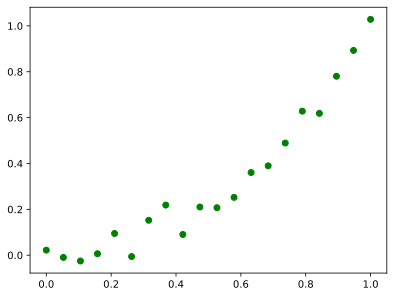

In [118]:
plt.plot(x, y, 'go')

In [119]:
coeffs = np.array([[n, np.sum(x), np.sum(x**2)],
                  [np.sum(x), np.sum(x**2), np.sum(x**3)],
                  [np.sum(x**2), np.sum(x**3), np.sum(x**4)]])
b = np.array([np.sum(y), np.sum(x*y), np.sum(x**2*y)])

In [120]:
a = np.linalg.solve(coeffs, b)

In [121]:
a

array([ 0.02309339, -0.2146529 ,  1.18170528])

In [122]:
xx = np.linspace(0, 1, 100)
reg_xx = xx**2*a[2] + xx*a[1] + a[0]

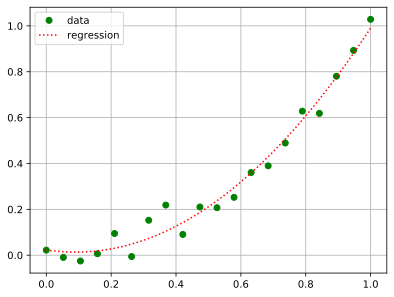

In [124]:
plt.plot(x, y, 'go', label='data')
plt.plot(xx, reg_xx, 'r:', label='regression')
plt.grid(True)
plt.legend()

In [125]:
reg_x = x**2*a[2] + x*a[1] + a[0]

In [133]:
S = np.sqrt(np.sum((y - reg_x)**2)/(n-3))

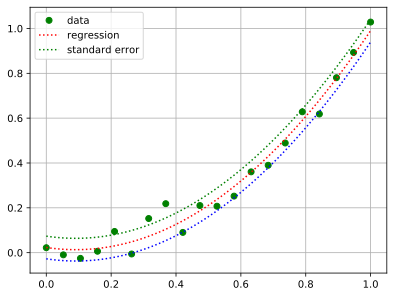

In [134]:
plt.plot(x, y, 'go', label='data')
plt.plot(xx, reg_xx, 'r:', label='regression')
plt.plot(xx, reg_xx+S, 'g:', label='standard error')
plt.plot(xx, reg_xx-S, 'b:')
plt.grid(True)
plt.legend()

### Polynomial regression using polyfit

In [128]:
a = np.polyfit(x, y, 2)

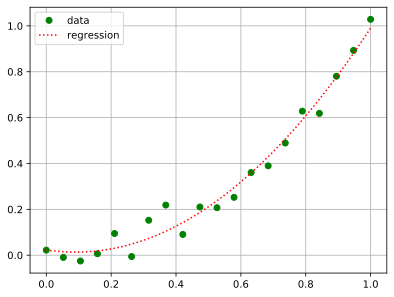

In [132]:
plt.plot(x, y, 'go', label='data')
plt.plot(xx, np.polyval(a, xx), 'r:', label='regression')
plt.grid(True)
plt.legend()

In [131]:
a

array([ 1.18170528, -0.2146529 ,  0.02309339])